In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "/content/drive/My Drive/ML With python /Final/ItemList.xlsx"

In [0]:
import pandas as pd
data = pd.read_excel(path, header = None)

In [0]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data.shape

(14963, 11)

In [0]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10
14958,tropical fruit,berries,other vegetables,yogurt,kitchen towels,napkins,NaN,NaN,NaN,NaN,NaN
14959,bottled water,herbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14960,fruit/vegetable juice,onions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14961,soda,root vegetables,semi-finished bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14962,bottled beer,other vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 11 columns):
0     14963 non-null object
1     14963 non-null object
2     4883 non-null object
3     2185 non-null object
4     795 non-null object
5     451 non-null object
6     276 non-null object
7     196 non-null object
8     51 non-null object
9     1 non-null object
10    1 non-null object
dtypes: object(11)
memory usage: 1.3+ MB


In [0]:
data.shape

(14963, 11)

In [0]:
records = [] 
for i in range(0, data.shape[0]):  
    records.append([str(data.values[i,j]) for j in range(0, data.shape[1])])

In [0]:
records[1]

['whole milk',
 'pastry',
 'salty snack',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [0]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.shape

(14963, 168)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Columns: 168 entries, Instant food products to zwieback
dtypes: bool(168)
memory usage: 2.4 MB


In [0]:
df.head(3)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)


In [0]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
1,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
2,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009
3,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371
4,(UHT-milk),(soda),0.021386,0.097106,0.001270,0.059375,0.611444,-0.000807,0.959887
...,...,...,...,...,...,...,...,...,...
445,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642
446,"(whole milk, sausage)",(soda),0.008955,0.097106,0.001069,0.119403,1.229612,0.000200,1.025320
447,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
448,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541


In [0]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
4,(rolls/buns),(UHT-milk),0.110005,0.021386,0.001804,0.016403,0.767013,-0.000548,0.994934
...,...,...,...,...,...,...,...,...,...
1233,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1234,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
1235,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307
1236,(whole milk),"(yogurt, sausage)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596


In [0]:
for row in rules.iterrows():   
    if "sausage" in row[1][0]:
        print(row)

(8, antecedents            (sausage)
consequents           (UHT-milk)
antecedent support     0.0603489
consequent support     0.0213861
support               0.00113614
confidence             0.0188261
lift                    0.880298
leverage             -0.00015449
conviction              0.997391
Name: 8, dtype: object)
(91, antecedents             (sausage)
consequents           (beverages)
antecedent support      0.0603489
consequent support      0.0165742
support                0.00153712
confidence              0.0254707
lift                      1.53676
leverage               0.00053689
conviction                1.00913
Name: 91, dtype: object)
(139, antecedents                (sausage)
consequents           (bottled beer)
antecedent support         0.0603489
consequent support         0.0453118
support                   0.00334158
confidence                  0.055371
lift                           1.222
leverage                 0.000607062
conviction                   1.01065


In [0]:
support=rules['support'].values
confidence=rules['confidence'].values
lift = rules['lift'].values

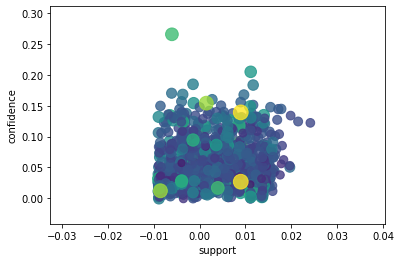

In [0]:
import random
import matplotlib.pyplot as plt

for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)   

plt.scatter(support, confidence, s= lift*100,alpha=0.8, c = lift)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [0]:
result = df.apply(pd.value_counts).fillna(0)
result

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
False,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,14715,14285,14055,14925,14400,14436,14700,14871,14897,14748,14261,14848,14942,14881,14786,14921,14783,14546,14610,14903,14168,14932,14889,14947,14490,14865,14948,14946,14951,14609,...,14874,14682,14919,14060,14857,14821,14251,14943,14753,14936,14943,13510,14813,14922,14915,14917,14754,14891,14724,14934,14952,14923,14863,14698,14895,14942,14936,14941,14958,13949,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903
True,60,320,22,29,3,4,121,17,508,326,248,678,908,38,563,527,263,92,66,215,702,115,21,82,177,42,180,417,353,60,795,31,74,16,473,98,15,17,12,354,...,89,281,44,903,106,142,712,20,210,27,20,1453,150,41,48,46,209,72,239,29,11,40,100,265,68,21,27,22,5,1014,80,51,277,654,8,359,175,2363,1285,60


In [0]:
df_true = result.iloc[1,:]
df_true[:10]

Instant food products     60
UHT-milk                 320
abrasive cleaner          22
artif. sweetener          29
baby cosmetics             3
bags                       4
baking powder            121
bathroom cleaner          17
beef                     508
berries                  326
Name: True, dtype: int64

In [0]:
x = df_true.sort_values(ascending=False)


In [0]:
fif_products = x[:15]
fif_products

whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
pastry               774
pip fruit            734
shopping bags        712
canned beer          702
bottled beer         678
Name: True, dtype: int64

In [0]:
import numpy as np
pos = np.arange(len(fif_products.values))

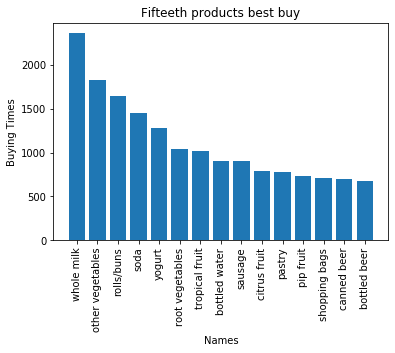

In [0]:
plt.bar(pos, fif_products.values, align='center')
plt.xticks(pos, fif_products.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('Fifteeth products best buy')
plt.show()

In [0]:
z = df_true.sort_values(ascending=True)

In [0]:
fif_products_min = z[:15]
fif_products_min

preservation products     1
kitchen utensil           1
baby cosmetics            3
bags                      4
frozen chicken            5
toilet cleaner            5
rubbing alcohol           5
make up remover           5
salad dressing            6
whisky                    8
decalcifier               9
hair spray                9
liqueur                   9
organic products         10
specialty vegetables     11
Name: True, dtype: int64

In [0]:
import numpy as np
pos_min = np.arange(len(fif_products_min.values))

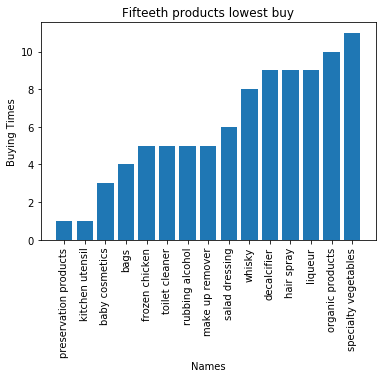

In [0]:
import matplotlib.pyplot as plt
plt.bar(pos_min, fif_products_min.values, align='center')
plt.xticks(pos_min, fif_products_min.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('Fifteeth products lowest buy')
plt.show()